# Detección de anomalías por MAD #
El presente código corresponde al ejemplo de detección de anomalías mediante MAD. Lo que busca este código es brindar una guía o tutorial para las personas que mantegan dudas respecto a cómo es la aplicación del método. 

Este código corresponde a la tesis:

"Investigación, Implementación y Medición de Distintos Algoritmos para la Detección de Anomalías"

<H2>El conjunto de datos</H2>
El conjunto de datos utilizado para el siguiente análisis fue sacado de la siguiente publicación:


*  Sokal, R. R., & Hunter, P. E. (1955). A Morphometric Analysis of Ddt-Resistant and Non-Resistant House Fly Strains1, 2. Annals of the Entomological Society of America, 48(6), 499–507. https://doi.org/10.1093/aesa/48.6.499

El conjunto de datos es una muestra de una población de moscas domésticas a las cuales se les midieron sus alas y se registraron.
Las mediciones tomadas para la anterior investigación representan una distribución Gaussina, estos datos pertenecen al campo de la biometría.

El conjunto de datos se puede adquirir libremente en la siguiente liga:


*   https://seattlecentral.edu/qelp/sets/057/057.html#About




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro

In [2]:
df = pd.read_csv("/content/sample_data/dataset_ala_mosca_domestica.csv", sep=';',
                 names = ['long_ala'])

In [3]:
df

,long_ala
0,36
1,37
2,38
3,38
4,39
...,...
95,52
96,53
97,53
98,54


Se puede observar que la muestra crea una perfecta campana de Gauss, por ende vamos a insertar un dato artificalmente para juegue el rol de anomalía y así crear un ejemplo de juguete.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


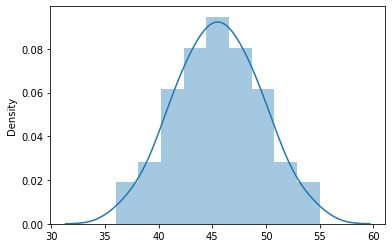

In [4]:
sns.distplot(df)

In [5]:
x = df['long_ala'].values

In [6]:
x

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55])

Añadimos artificialmente un dato que se anómalo en nuestra muestra.

In [7]:
x_anom = np.append(x, [62], axis=0)

In [8]:
x_anom

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55, 62])

Ahora se tiene un el dato anómalo insertado artificalmente dentro del conjunto de datos, pasamos a ver de nuevo el histograma.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


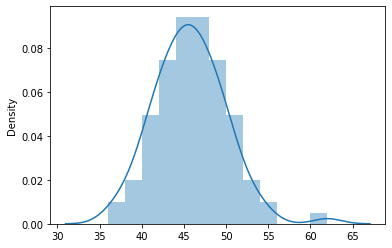

In [9]:
sns.distplot(x_anom)

A primera vista se puede indentificar la normalidad de la distribución, y es más notorio aún cuando la muestra es grande. De cualquier manera se debe aplicar una prueba estadística para comprobar formalmente la hipótesis. En este caso vamos a aplicar Shapiro-Wilk.

La significancia *a* será 0.05 o el 5 %, si nuestro p-value es mayor a *a* entonces tendremos una distribución normal.

In [10]:
shapiro_test = shapiro(x_anom)

In [11]:
shapiro_test

(0.978909432888031, 0.10573770105838776)

Aquí se puede observar que el p-value que obtuvimos es aproximado a 0.11 lo cual implica que la hipótesis se cumple, ya que p-value es mayor que *a*. Por lo tanto nuestra distribución es normal.
Se procede a calcular el MAD para los datos de nuestra muestra.

In [12]:
MAD = np.median(np.abs(x_anom - np.median(x_anom)))

In [13]:
MAD

3.0

Ya tenemos el valor de MAD para nuestras alas de mosca doméstica, ahora pasamos a calcular el valor z modificado para todos los datos de la muestra.

In [14]:
z_modificado = (0.6745 * (x_anom - np.median(x_anom))) / MAD

In [15]:
z_modificado

array([-2.24833333, -2.0235    , -1.79866667, -1.79866667, -1.57383333,
       -1.57383333, -1.349     , -1.349     , -1.349     , -1.349     ,
       -1.12416667, -1.12416667, -1.12416667, -1.12416667, -1.12416667,
       -1.12416667, -0.89933333, -0.89933333, -0.89933333, -0.89933333,
       -0.89933333, -0.89933333, -0.89933333, -0.6745    , -0.6745    ,
       -0.6745    , -0.6745    , -0.6745    , -0.6745    , -0.6745    ,
       -0.6745    , -0.44966667, -0.44966667, -0.44966667, -0.44966667,
       -0.44966667, -0.44966667, -0.44966667, -0.44966667, -0.44966667,
       -0.22483333, -0.22483333, -0.22483333, -0.22483333, -0.22483333,
       -0.22483333, -0.22483333, -0.22483333, -0.22483333, -0.22483333,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.22483333,  0.22483333,  0.22483333,  0.22483333,  0.22483333,
        0.22483333,  0.22483333,  0.22483333,  0.22483333,  0.44

Cabe recordar que para detectar las anomalías, es necesario sacar el valor absoluto del valor z modificado y aquellos valores que sobrepasen 3.5 serán catalogados como anomalías.

In [16]:
z_modificado_abs = np.abs(z_modificado)

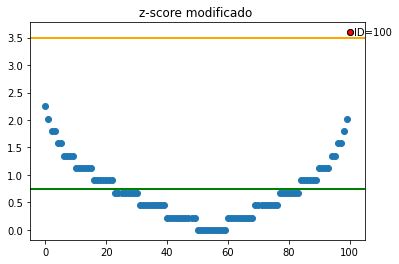

In [17]:
plt.scatter(range(len(z_modificado_abs)), z_modificado_abs)
plt.axhline(np.mean(z_modificado_abs), color='green', linewidth=2)
plt.axhline(3.5, color='orange', linewidth=2)
plt.title("z-score modificado ")
for cont, z_score_mod in enumerate(z_modificado_abs):
    if z_score_mod >3.5:
        plt.scatter(cont, z_score_mod, color='red', edgecolors='black')
        plt.text(cont+1.5, z_score_mod, 'ID={}'.format(cont), va='center')

plt.show()

Se puede observar que efectivamente, muestra anomalía, en este caso está resaltada por el color rojo, sobrepasa los 3.5 para ser catalogada como tal.
Para corroborar que es el mismo dato insertado, cabe recordar que el dato ingresado arficialmete era el ID = 100, ya que nuestra muestra tenía, anterior a la inserción, 100 elementos que llegaban hasta el ID 99.
